# SP USVP
## Martin Adamec

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import skimage
from skimage import data
from skimage.color import rgba2rgb,rgb2gray
import skimage.segmentation
import scipy
import skimage.io

In [3]:
coinsPath = "./Binary_coins.png"
twigsPath = "./twigs.jpg"

## Úkol 1 - Morfologické operace

In [4]:
def dilate(image, element):
    """
        Binary dilation function

        @param image - input image
        @param element - element
    """
    result = np.zeros(image.shape, dtype=np.uint8)
    indices = np.where(image == 1)
    elements = np.where(element == 1)
    for y,x in zip(indices[0], indices[1]):
        # odečtení 1 - chceme, aby na pixelu byl střed elementu namísto okraje
        res0 = y + elements[0] -1
        res1 = x + elements[1] -1
        result[res0, res1] = 1
    return result

def erode(image, element):
    """
        Binary erosion function

        @param image - input image
        @param element - element
    """    
    result = np.zeros(image.shape, dtype=np.uint8)
    indexes = np.where(image == 1)
    elements = np.where(element == 1)
    for y,x in zip(indexes[0], indexes[1]):
        res = [1-item for item in image[y+elements[0], x+elements[1]].ravel()]
        if(sum(res) == 0):
            # přičtení 1 - chceme, aby na pixelu byl střed elementu namísto okraje
            result[y+1, x+1] = 1
    return result

### Eroze

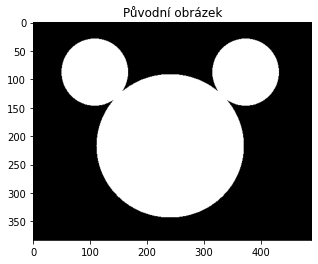

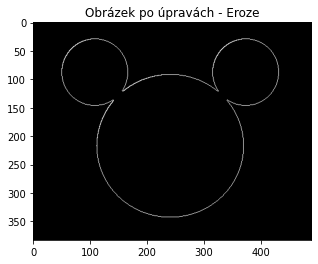

In [5]:
image_coins = skimage.io.imread(coinsPath,as_gray=True)

# binární obrázek
image_coins = np.uint8(image_coins>0)

fig1 = plt.figure(1)
plt.title('Původní obrázek')
plt.imshow(image_coins,cmap = 'gray')


elem = np.matrix([[0.0, 1.0, 0.0], [1.0, 1.0, 1.0], [0.0, 1.0, 0.0]])

res_im = erode(image_coins, elem)

fig2 = plt.figure(2)
plt.title('Obrázek po úpravách - Eroze')
plt.imshow((image_coins-res_im)*255,cmap='gray')

#fig2.savefig('adamecm_coins_erosion')


### Dilatace

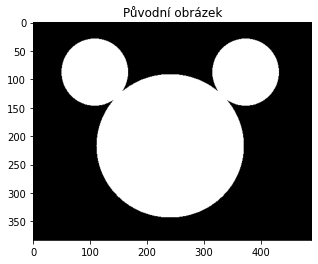

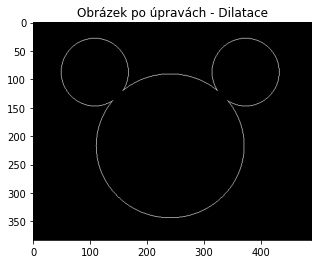

In [6]:
image_coins = skimage.io.imread(coinsPath,as_gray=True)

# binární obrázek
image_coins = np.uint8(image_coins>0)

fig1 = plt.figure(1)
plt.imshow(image_coins,cmap = 'gray')
plt.title('Původní obrázek')

elem = np.matrix([[0.0, 1.0, 0.0], [1.0, 1.0, 1.0], [0.0, 1.0, 0.0]])
res_im = dilate(image_coins, elem)
fig2 = plt.figure(2)
plt.title('Obrázek po úpravách - Dilatace')
plt.imshow((res_im-image_coins)*255,cmap='gray')

#fig2.savefig('adamecm_coins_dilation')

## Úkol 2 - Fourierova transformace

Text(0.5, 1.0, 'Obrázek po úpravách')

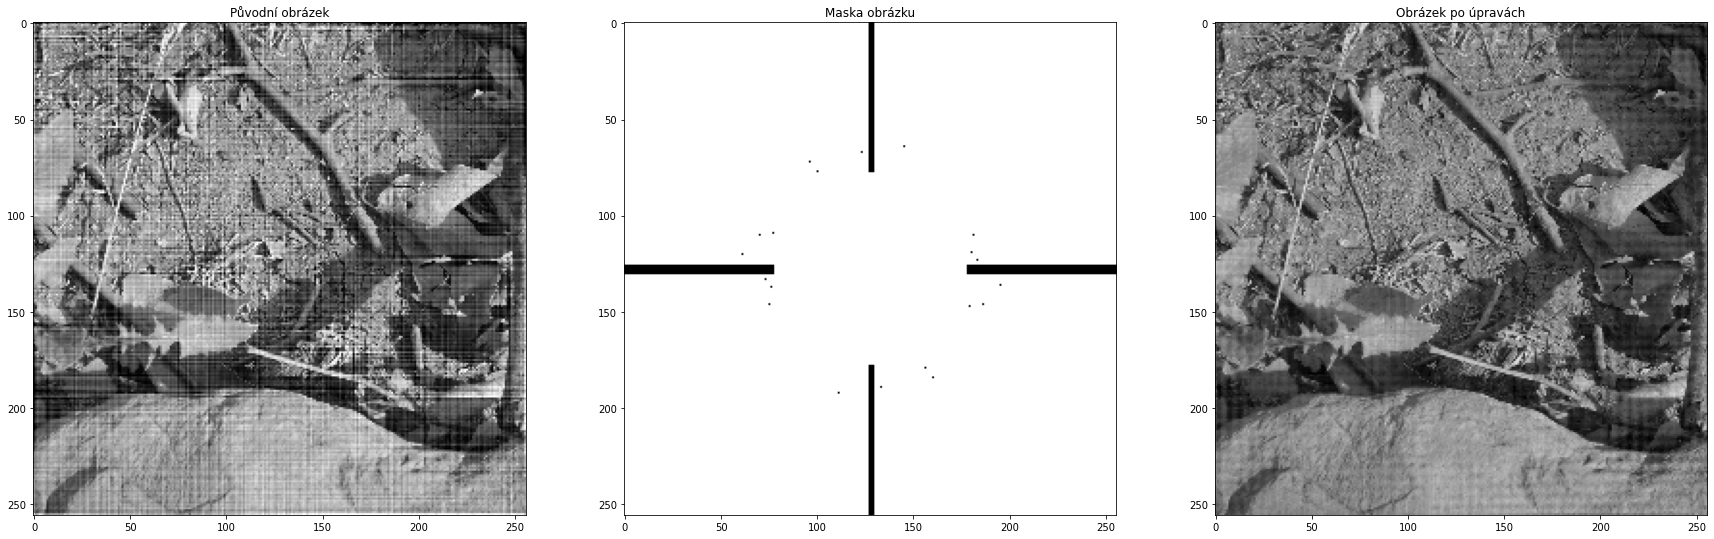

In [7]:
image_twigs = skimage.io.imread(twigsPath,as_gray=True)

twigSize = np.shape(image_twigs)

fft_twigs = np.fft.fft2(image_twigs)
ftshift_twigs = np.fft.fftshift(fft_twigs)
spectrum_twigs = 20*np.log(np.abs(ftshift_twigs))

# Vynechání středu - tam jsou nejjasnější body správně
center0 = int(twigSize[0]/2)
center1 = int(twigSize[1]/2)
temp = spectrum_twigs.copy()

for i in range(center0-50,center0+50):
    for j in range(center1-50,center1+50):
        temp[i][j] = 0

thr = np.max(temp)-20
mask = np.uint8(temp<thr)

maskedTwigsFt = (ftshift_twigs)*mask
maskedTwigs = np.abs(np.fft.ifft2(maskedTwigsFt))

fig, (ax1,ax2,ax3) = plt.subplots(1,3)
fig.set_figheight(30)
fig.set_figwidth(30)
ax1.imshow(image_twigs,cmap='gray')
ax1.set_title('Původní obrázek')
ax2.imshow(mask,cmap='gray')
ax2.set_title('Maska obrázku')
ax3.imshow(maskedTwigs,cmap='gray')
ax3.set_title('Obrázek po úpravách')

#fig.savefig('adamecm_twigs')